<a href="https://colab.research.google.com/github/ai7dnn/2021-2-DNN/blob/main/code/21_11_classification_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃허브 저장소](https://github.com/wikibook/tf2)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃허브 저장소의 [Issues](https://github.com/wikibook/tf2/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

# 5.1 이항 분류

In [ ]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [18]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [19]:
# 5.1 와인 데이터셋 불러오기
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   

In [20]:
print(red.shape)
print(white.shape)

(1599, 12)
(4898, 12)


In [21]:
# 5.2 와인 데이터셋 합치기
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75

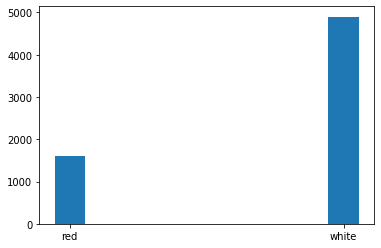

1    4898
0    1599
Name: type, dtype: int64


In [24]:
# 5.3 레드 와인과 화이트 와인 type 히스토그램
import matplotlib.pyplot as plt
plt.hist(wine['type'])
# plt.xticks([0, 1])
plt.xticks([0.05, 0.95], ['red', 'white'])
plt.show()

print(wine['type'].value_counts())

Text(0, 0.5, 'Frequency')

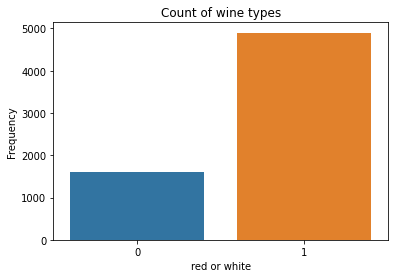

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.hist(wine['type'], bins=2, rwidth=0.8)
# 히스토그램과 비슷한 Count 그래프. 이산값을 나타낸다. 
ax = plt.subplots()
ax = sns.countplot(x='type', data=wine)
ax = sns.countplot(x='type', data=wine)
ax.set_title('Count of wine types')
ax.set_xlabel('red or white')
ax.set_ylabel('Frequency')

In [26]:
import warnings
warnings.filterwarnings(action='ignore')

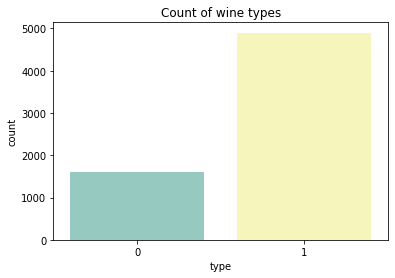

In [27]:
import matplotlib.pyplot as plt;
import seaborn as sns;

sns.countplot('type', data=wine, palette="Set3");
plt.title('Count of wine types') ;

In [28]:
# 5.4 데이터 요약 정보 확인
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 870.6 KB
None


In [29]:
# 5.5 데이터 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
0       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0
1       0.330579          0.533333     0.000000  ...  0.260870  0.333333   0.0
2       0.330579          0.453333     0.024096  ...  0.260870  0.333333   0.0
3       0.611570          0.133333     0.337349  ...  0.260870  0.500000   0.0
4       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0

[5 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        0.282257          0.173111  ...     0.469730     0.753886
std         0.107143          0.109758  ...     0.145543     0.430779
min         0.000000          0.000000  ...     0.000000     0.000000
25%         0.214876          0.100000  ...     0.333333     1.000000
50%         0.264463          0.140000  ...     0.500000     1.000000
75%         0

In [30]:
# 5.6 데이터 섞은 후 numpy array로 변환
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
1847       0.297521          0.240000     0.120482  ...  0.144928  0.333333   1.0
3758       0.231405          0.126667     0.198795  ...  0.391304  0.333333   1.0
1831       0.297521          0.273333     0.144578  ...  0.579710  0.666667   1.0
4378       0.223140          0.156667     0.120482  ...  0.115942  0.333333   1.0
4406       0.206612          0.140000     0.174699  ...  0.695652  0.666667   1.0

[5 rows x 13 columns]
[[0.29752066 0.24       0.12048193 0.16717791 0.06644518 0.14930556
  0.34792627 0.20994795 0.42635659 0.12359551 0.14492754 0.33333333
  1.        ]
 [0.23140496 0.12666667 0.19879518 0.01226994 0.05481728 0.07986111
  0.4078341  0.09716599 0.44186047 0.13483146 0.39130435 0.33333333
  1.        ]
 [0.29752066 0.27333333 0.14457831 0.22239264 0.03488372 0.11458333
  0.33870968 0.15789474 0.31782946 0.16292135 0.57971014 0.66666667
  1.        ]
 [0.2231405  0.15666667 0.12048193 

In [31]:
# 5.7 train 데이터와 test 데이터로 분리
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0.29752066 0.24       0.12048193 0.16717791 0.06644518 0.14930556
 0.34792627 0.20994795 0.42635659 0.12359551 0.14492754 0.33333333]
1.0
[0.38842975 0.32       0.44578313 0.26457055 0.06976744 0.17361111
 0.54608295 0.25814536 0.20930233 0.26966292 0.17391304 0.33333333]
1.0
[0. 1.]
[0. 1.]


In [32]:
y = [2, 0, 1]
d = tf.keras.utils.to_categorical(y, num_classes=3)
d[2]

array([0., 1., 0.], dtype=float32)

In [33]:
# 5.8 와인 데이터셋 분류 모델 생성
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


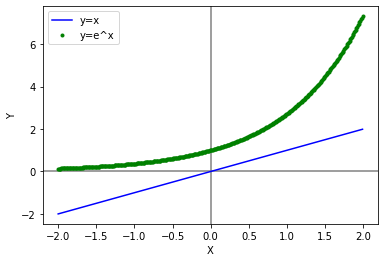

In [34]:
# 그림 5.5 출력 코드
import matplotlib.pyplot as plt
import math
import numpy as np
x = np.arange(-2, 2, 0.01)
e_x = math.e ** x

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, x, 'b-', label='y=x')
plt.plot(x, e_x, 'g.', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [35]:
# 다음 훈련에서 한 에폭에서 w, b를 update하는 수 계산
len(train_X) * (1-0.25) / 32

121.8046875

In [36]:
# 5.9 와인 데이터셋 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 4ms/step - loss: 0.1351 - accuracy: 0.9582 - val_loss: 0.0356 - val_accuracy: 0.9885
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0734 - accuracy: 0.9777 - val_loss: 0.0291 - val_accuracy: 0.9885
Epoch 3/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9843 - val_loss: 0.0324 - val_accuracy: 0.9923
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9874 - val_loss: 0.0261 - val_accuracy: 0.9931
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9885 - val_loss: 0.0182 - val_accuracy: 0.9931
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.1014 - accuracy: 0.9754 - val_loss: 0.4521 - val_accuracy: 0.8185
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9636 - val_loss: 0.0247 - val_accuracy: 0.9923
Epoch 

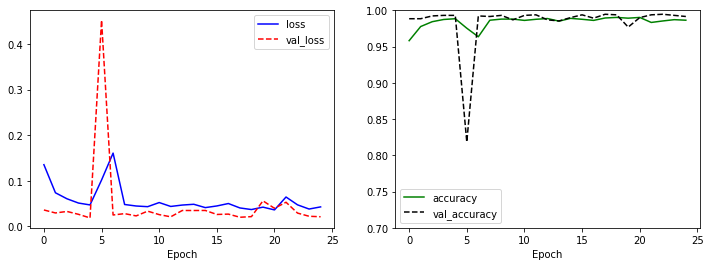

In [37]:
# 5.10 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [38]:
# 5.11 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9908


[0.040875885635614395, 0.9907692074775696]

#5.2 다항 분류

In [39]:
# 5.12 품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


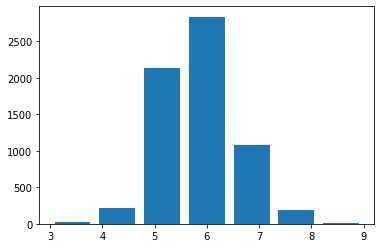

In [40]:
# 5.13 품질 히스토그램 시각화
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

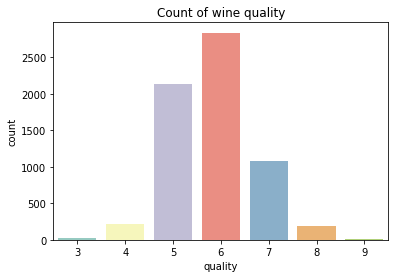

In [41]:
import matplotlib.pyplot as plt;
import seaborn as sns;

sns.countplot(x='quality', data=wine, palette="Set3");
plt.title('Count of wine quality') ;

In [43]:
# 5.14 품질을 3개의 범주(좋음, 보통, 나쁨)로 재분류
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())
wine.shape

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


(6497, 14)

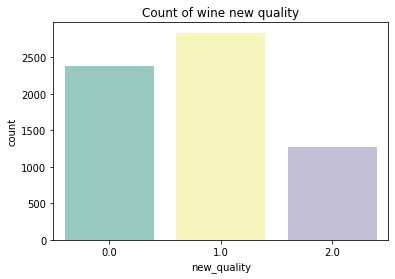

In [44]:
import matplotlib.pyplot as plt;
import seaborn as sns;

sns.countplot('new_quality', data=wine, palette="Set3");
plt.title('Count of wine new quality') ;

In [45]:
# 5.15 데이터 정규화 및 train, test 데이터 분리
del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [46]:
# 5.16 와인 데이터셋 다항 분류 모델 생성 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 4ms/step - loss: 0.4851 - accuracy: 0.7904 - val_loss: 0.4479 - val_accuracy: 0.7877
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8011 - val_loss: 0.4419 - val_accuracy: 0.7808
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8024 - val_loss: 0.4250 - val_accuracy: 0.8123
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.8055 - val_loss: 0.4173 - val_accuracy: 0.8062
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8075 - val_loss: 0.4248 - val_accuracy: 0.8008
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8024 - val_loss: 0.4245 - val_accuracy: 0.8000
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8088 - val_loss: 0.4620 - val_accuracy: 0.7962
Epoch 

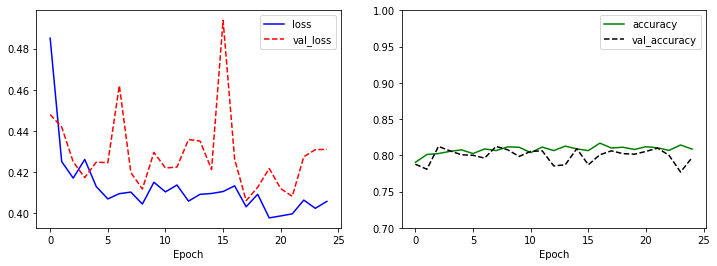

In [47]:
# 5.17 다항 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [48]:
# 5.18 다항 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.3684 - accuracy: 0.8269


[0.3684007227420807, 0.8269230723381042]

#5.3 Fashion MNIST

In [ ]:
# 5.19 Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

4423680/4422102 [==============================] - 0s 0us/step
60000 10000


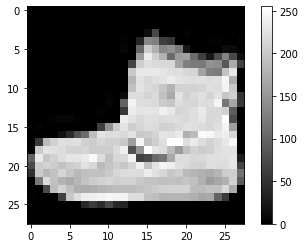

9


In [ ]:
# 5.20 데이터 확인
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [ ]:
len(train_Y)

60000

In [ ]:
import matplotlib.pyplot as plt;
import seaborn as sns;

sns.countplot('', data=train_Y, palette="Set3");
plt.title('Count of wine new quality') ;

AttributeError: ignored

In [ ]:
# 5.21 데이터 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [ ]:
# 5.22 Fashion MNIST 분류 모델
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 5.23 Fashion MNIST 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.5221 - accuracy: 0.8170 - val_loss: 0.4171 - val_accuracy: 0.8524
Epoch 2/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3877 - accuracy: 0.8615 - val_loss: 0.3970 - val_accuracy: 0.8575
Epoch 3/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3501 - accuracy: 0.8737 - val_loss: 0.3783 - val_accuracy: 0.8654
Epoch 4/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3229 - accuracy: 0.8809 - val_loss: 0.3474 - val_accuracy: 0.8779
Epoch 5/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3021 - accuracy: 0.8895 - val_loss: 0.3420 - val_accuracy: 0.8735
Epoch 6/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2890 - accuracy: 0.8938 - val_loss: 0.3201 - val_accuracy: 0.8835
Epoch 7/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2726 - accuracy: 0.8996 - val_loss: 0.3268 - val_accuracy:

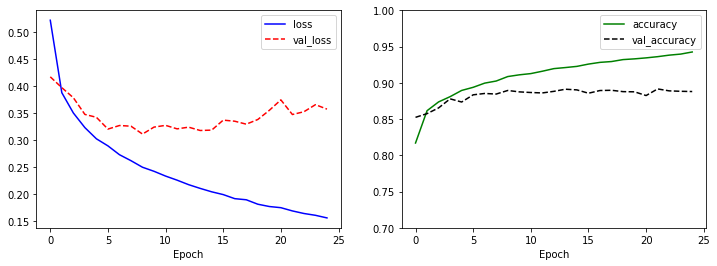

In [ ]:
# 5.24 Fashion MNIST 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [ ]:
# 5.25 Fashion MNIST 분류 모델 평가
model.evaluate(test_X, test_Y)

313/313 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8791


[0.39949995279312134, 0.8791000247001648]